<a href="https://colab.research.google.com/github/Kushagra651/Fashion-Mnist/blob/main/FashionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [3]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt


In [5]:
fashion_mnist = datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
type(train_images)

numpy.ndarray

In [8]:
type(train_labels)

numpy.ndarray

In [9]:
print(len(train_images))

60000


In [10]:
print(len(train_labels))

60000


In [11]:
print(train_images[0].shape)

(28, 28)


In [12]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

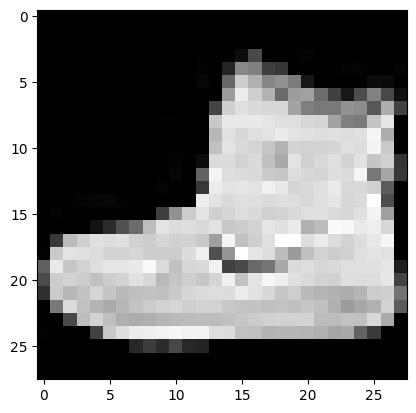

In [13]:
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [16]:
print(train_labels[0])

9


normalizing the pixels in the range of 0 and 1


In [17]:
train_images,test_images,train_labels,test_labels = train_images/255.0,test_images/255.0,train_labels,test_labels

In [18]:
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [19]:
models = models.Sequential()
models.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
models.add(layers.MaxPooling2D((2,2)))
models.add(layers.Conv2D(64,(3,3),activation='relu'))
models.add(layers.MaxPooling2D((2,2)))
models.add(layers.Conv2D(64,(3,3),activation='relu'))

#add dense layer to the models
models.add(layers.Flatten())
models.add(layers.Dense(64,activation='relu'))
models.add(layers.Dense(10,activation='softmax'))
models.add(layers.Dense(10))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#complile and train the model
models.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [24]:
#model training
history = models.fit(train_images,train_labels,epochs=5,
                     validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8928 - loss: 0.4515 - val_accuracy: 0.8830 - val_loss: 0.4436
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9080 - loss: 0.3676 - val_accuracy: 0.8886 - val_loss: 0.3958
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9169 - loss: 0.3025 - val_accuracy: 0.8941 - val_loss: 0.3550
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9255 - loss: 0.2564 - val_accuracy: 0.8958 - val_loss: 0.3426
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9313 - loss: 0.2269 - val_accuracy: 0.8955 - val_loss: 0.3507


In [25]:
#model evaluation
test_loss,test_acc = models.evaluate(test_images,test_labels,verbose=2)
print("\n the test accuracy: ", test_acc)

313/313 - 3s - 8ms/step - accuracy: 0.8955 - loss: 0.3507

 the test accuracy:  0.8955000042915344


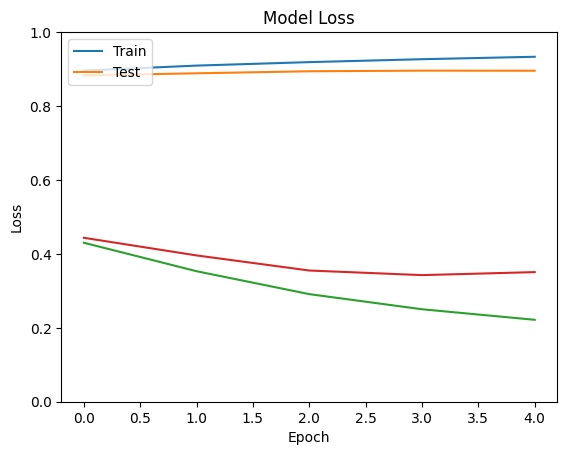

In [30]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.ylim([0.5,1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.ylim([0,1.0])
plt.show()

In [31]:
models.save("trained_fashion_mnist.h5")